# Steam Game Dataset Analysis

## Introduction

This is a practice dataset analysis pilot project for my High School Computer Science course. Throughout this notebook, I'll be using Steam Store data that was scraped and uploaded onto Kaggle. In the future, I'll likely do another trial by scraping and cleaning out my own data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast

Now, the data that'll be used for the purpose of this notebook has already been scraped from the internet and is stored on my repository. Unfortunately, GitHub limits files to 50 MB. The json data files had to be split into different chunks in order to fit. In order to analyze them with pandas, they need to be formed back into one dataframe.

(The JSONs were downloaded and split using the file titled 'scrapedata.py'. It's available on the repo if needed.)

In [7]:
# read the split json files and concatenate them
json_files = [f'https://raw.githubusercontent.com/1metropolis/steam-analysis/refs/heads/main/data/data_{i}.json' for i in range(1, 17)]
dfs = [pd.read_json(file, orient='index') for file in json_files]

df = pd.concat(dfs)

In [8]:
df.head()

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,...,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,discount
20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",NaN
655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",NaN
1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",,https://cdn.akamai.steamstatic.com/steam/apps/...,...,0,0,0 - 20000,0,0,0,0,0,[],NaN
1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",NaN
1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",NaN


Each entry is identifiable by the game_id located in the leftmost column. The following attributes are available for each game entry:

In [9]:
print("game count:",len(sd))
print(df.columns)

game count: 111452
Index(['name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'discount'],
      dtype='object')


## Cleaning Data

Let's see what kinds of games are included in the dataset.

Here are some tags that Steam users assigned to different games:

In [10]:
unique_tags = set(
    tag
    for tag_dict in df['tags']
    if isinstance(tag_dict, dict)
    for tag in tag_dict.keys()
)

print(unique_tags)

{'Minigames', 'Multiplayer', 'Mythology', 'Fishing', 'Racing', 'Funny', 'Massively Multiplayer', 'Political', 'Bowling', 'War', 'Software', 'America', 'Experience', '2.5D', 'Game Development', 'Party', 'Dog', 'LGBTQ+', 'Cyberpunk', 'Open World Survival Craft', 'Heist', 'Tanks', 'Asynchronous Multiplayer', '3D Fighter', 'Colorful', 'Atmospheric', 'Female Protagonist', 'Party-Based RPG', 'Team-Based', 'Football', 'Mini Golf', 'Dark', '2D Platformer', 'Gaming', 'Tabletop', 'Cold War', 'Psychedelic', 'ATV', 'Horror', 'Anime', 'Visual Novel', 'Roguevania', 'Mystery Dungeon', 'Old School', '1980s', 'Base-Building', 'Mature', 'Shooter', 'Extraction Shooter', 'NSFW', 'Silent Protagonist', 'Rock Music', 'Character Action Game', 'Lovecraftian', 'Cricket', 'Puzzle-Platformer', 'Comic Book', 'Time Travel', 'Co-op', 'Precision Platformer', 'Hidden Object', 'Conversation', 'Tower Defense', 'Transportation', 'Economy', 'Outbreak Sim', 'Narration', 'Great Soundtrack', 'Escape Room', 'Benchmark', 'Word

We also have listed the dates that each game was released.

In [54]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce') # note to self - move this to cleaning section to set all games to fix all dates
release_year = df['release_date'].dt.year
annual_releases = release_year.value_counts().sort_index()

# since 2025 isn't over, drop to remove incomplete data
annual_releases = annual_releases.drop(2025, errors='ignore')

The Video Game Industry has grown tremendously in the past 20 years.

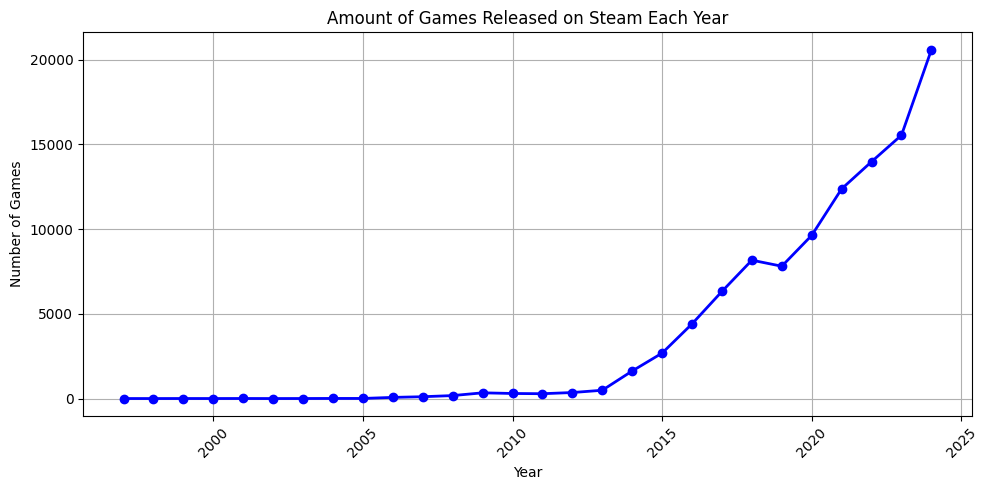

In [55]:
fig = plt.figure(figsize=(10,5))
sg = fig.add_subplot()

sg.plot(annual_releases.index, annual_releases.values, 'bo-', linewidth=2)

sg.set_title('Amount of Games Released on Steam Each Year')
sg.set_xlabel('Year')
sg.set_ylabel('Number of Games')
sg.grid(True)

plt.xticks(rotation=45) # looks cooler
plt.tight_layout()
plt.show()

## Modification

## Analysis

### Section 1

Placeholder text - lets see the popularity of certain games over time

In [35]:
cardgames = df[df['tags'].apply(lambda x: isinstance(x, dict) and 'Card Game' in x)]
cardgames

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,...,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,discount
485000,Cthulhu Realms,2016-07-01,0,0.00,1,Star Realms has gone insane! Introducing Cthul...,Star Realms has gone insane! Introducing Cthul...,Star Realms has gone insane! Introducing Cthul...,“The art in Cthulhu Realms is hilarious and be...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,147,58,50000 - 100000,224,0,257,0,0,"{'Card Game': 34, 'Strategy': 33, 'Deckbuildin...",NaN
897820,Reigns: Game of Thrones,2018-10-18,0,3.99,0,Reigns: Game of Thrones is the heir to the awa...,Reigns: Game of Thrones is the heir to the awa...,Reigns: Game of Thrones is the heir to the awa...,“Reigns: Game of Thrones is so much better tha...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,698,203,50000 - 100000,83,0,76,0,2,"{'RPG': 79, 'Indie': 66, 'Card Game': 60, 'Adv...",NaN
658970,CasinoRPG,2018-01-16,0,0.00,0,Check Out Our Upcoming Game / About the Game P...,Play the tables or own the strip in this Vegas...,Play the tables or own the strip in this Vegas...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,138,84,50000 - 100000,2,0,2,0,19,"{'Simulation': 125, 'Massively Multiplayer': 1...",NaN
1944730,Square Keeper,2022-06-09,0,4.99,0,"Square Keeper is a puzzle game, based on a car...","Square Keeper is a puzzle game, based on a car...","Square Keeper is a puzzle game, based on a car...",,https://cdn.akamai.steamstatic.com/steam/apps/...,...,10,0,0 - 20000,0,0,0,0,0,"{'Casual': 48, 'Adventure': 42, 'Puzzle': 42, ...",NaN
1774810,Laruaville 10 Match 3 Puzzle,2021-10-17,0,6.99,0,This is a Match 3 game with many additional bo...,This is a Match 3 game with many additional bo...,A great Match 3 game with lots of bonus games!,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,1,1,0 - 20000,0,0,0,0,1,"{'Casual': 60, 'Match 3': 46, 'Solitaire': 37,...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449450,Clonizer,2025-04-14,0,11.99,0,Roadmap About the Game Hex-based tactics meets...,Hex-based tactics meets roguelike deckbuilding...,Clonizer combines Hex-based tactics and roguel...,,https://shared.akamai.steamstatic.com/store_it...,...,75,9,0 - 20000,0,0,0,0,75,"{'Space': 1102, 'Rogue-lite': 693, 'Turn-Based...",20.0
3051470,Kaya's Prophecy,2025-04-10,0,13.99,0,Kaya's Prophecy is a card-based village builde...,Kaya's Prophecy is a card-based village builde...,Kaya’s Prophecy is a unique card based village...,,https://shared.akamai.steamstatic.com/store_it...,...,90,26,0 - 20000,0,0,0,0,161,"{'Strategy': 301, 'City Builder': 296, 'Tactic...",0.0
3561960,乐吧斗地主,2025-03-27,0,3.99,0,这是一款单机的扑克斗地主游戏， 未来将加入赖子玩法，以及二人、四人斗地主玩法，敬请期待！,这是一款单机的扑克斗地主游戏， 未来将加入赖子玩法，以及二人、四人斗地主玩法，敬请期待！,这款单机的扑克斗地主游戏，让你可以在游戏中和电脑进行最大众化的三人斗地主，电脑随着玩家闯关的...,,https://shared.akamai.steamstatic.com/store_it...,...,3,0,0 - 20000,0,0,0,0,1,"{'Sports': 62, 'Card Game': 36, 'Solitaire': 3...",0.0
3617110,我在西游开黑店（Black shop in Journey to the West）,2025-04-16,0,4.49,0,In this mystical world of Journey to the West ...,In this mystical world of Journey to the West ...,This is a simulation management game set in th...,,https://shared.akamai.steamstatic.com/store_it...,...,18,3,0 - 20000,0,0,0,0,0,"{'Casual': 68, 'Strategy': 62, 'Card Game': 39...",10.0


lorem ipsum dolor sit amet

In [62]:
cardgames['release_date'] = pd.to_datetime(cardgames['release_date'], errors='coerce') # note to self - move this to cleaning section to set all games to fix all dates
card_year = cardgames['release_date'].dt.year
# since 2025 isn't over, drop to remove incomplete data

card_releases = card_year.value_counts().sort_index()
card_releases = card_releases.drop(2025, errors='ignore')

<ipython-input-62-3ded3dcae087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardgames['release_date'] = pd.to_datetime(cardgames['release_date'], errors='coerce') # note to self - move this to cleaning section to set all games to fix all dates


,release_date
485000,2016.0
897820,2018.0
658970,2018.0
1944730,2022.0
1774810,2021.0
...,...
2449450,2025.0
3051470,2025.0
3561960,2025.0
3617110,2025.0


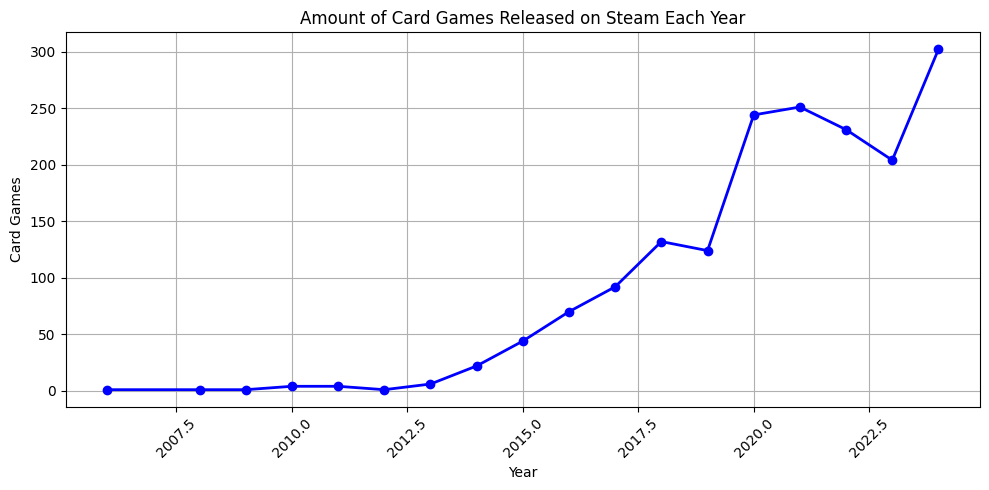

In [63]:
fig = plt.figure(figsize=(10,5))
cg = fig.add_subplot()

cg.plot(card_releases.index, card_releases.values, 'bo-', linewidth=2)

cg.set_title('Amount of Card Games Released on Steam Each Year')
cg.set_xlabel('Year')
cg.set_ylabel('Card Games')
cg.grid(True)

plt.xticks(rotation=45) # looks cooler
plt.tight_layout()
plt.show()

### Section 2

### Section 3